In [1]:
import pandas as pd
import numpy as np

In [2]:
player_attr = pd.read_csv("player_stats.csv")

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
player_attr.head().to_csv("player.csv", index = False)

In [7]:
match = pd.read_csv("match_data.csv")
match.head().to_csv("match.csv", index = False)

In [1]:
import pandas as pd

# Load the datasets
match_df = pd.read_csv('match_data.csv')
player_df = pd.read_csv('player_stats.csv')
team_attr_df = pd.read_csv('team_attr.csv')
team_data_df = pd.read_csv('team_data.csv')

# Identify player columns in match_df
player_cols = [col for col in match_df.columns if col.startswith('home_player_') or col.startswith('away_player_')]

# Unpivot match_df to have one row per player in a match
match_players = match_df.melt(id_vars=[col for col in match_df.columns if col not in player_cols], 
                              value_vars=player_cols, 
                              var_name='player_position', 
                              value_name='player_api_id')

# Merge player data with match data
merged_match_player_df = match_players.merge(player_df, on='player_api_id', how='left')

# Merge team attributes with team data
merged_team_df = team_attr_df.merge(team_data_df, on='team_api_id', how='left')

# Merge the resulting datasets together on team ids from match data
merged_dataset = merged_match_player_df.merge(merged_team_df, left_on='home_team_api_id', right_on='team_api_id', how='left')

# Display head of final merged dataset
print(merged_dataset.head())


   Unnamed: 0_x_x  id_x_x  country_id  league_id     season  stage  \
0           24207   24208       21518      21518  2015/2016     12   
1           24207   24208       21518      21518  2015/2016     12   
2           24207   24208       21518      21518  2015/2016     12   
3           24207   24208       21518      21518  2015/2016     12   
4           24207   24208       21518      21518  2015/2016     12   

                date_x  match_api_id  home_team_api_id  away_team_api_id  ...  \
0  2015-11-23 00:00:00       2030192              8305              8370  ...   
1  2015-11-23 00:00:00       2030192              8305              8370  ...   
2  2015-11-23 00:00:00       2030192              8305              8370  ...   
3  2015-11-23 00:00:00       2030192              8305              8370  ...   
4  2015-11-23 00:00:00       2030192              8305              8370  ...   

   defenceAggression  defenceAggressionClass defenceTeamWidth  \
0               30.0       

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import pandas as pd
import numpy as np

# Load the dataset

# Keep only the specified columns
columns_to_keep = ['overall_rating', 'potential', 'player_fifa_api_id', 'home_team_goal', 'away_team_goal', 
                   'league_id', 'home_team_api_id', 'away_team_api_id', 'match_api_id']
df_filtered = merged_dataset[columns_to_keep]

# Create match_winner column
conditions = [
    (df_filtered['home_team_goal'] > df_filtered['away_team_goal']),
    (df_filtered['home_team_goal'] < df_filtered['away_team_goal']),
    (df_filtered['home_team_goal'] == df_filtered['away_team_goal'])
]
choices = ['Home', 'Away', 'Draw']
df_filtered['match_winner'] = np.select(conditions, choices)

# Group by league
leagues = df_filtered.groupby('league_id')

# Analyze each league
for league_id, league_data in leagues:
    print(f"\n## League {league_id}")
    
    # Count of matches
    match_count = league_data['match_api_id'].nunique()
    print(f"Total matches: {match_count}")
    
    # Winner statistics
    winner_stats = league_data['match_winner'].value_counts(normalize=True) * 100
    print("\nMatch outcomes:")
    for outcome, percentage in winner_stats.items():
        print(f"{outcome}: {percentage:.2f}%")
    
    # Average goals per match
    avg_home_goals = league_data['home_team_goal'].mean()
    avg_away_goals = league_data['away_team_goal'].mean()
    print(f"\nAverage goals per match:")
    print(f"Home team: {avg_home_goals:.2f}")
    print(f"Away team: {avg_away_goals:.2f}")
    
    # Player statistics
    avg_rating = league_data['overall_rating'].mean()
    avg_potential = league_data['potential'].mean()
    print(f"\nPlayer statistics:")
    print(f"Average overall rating: {avg_rating:.2f}")
    print(f"Average potential: {avg_potential:.2f}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1892\1914460007.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['match_winner'] = np.select(conditions, choices)



## League 21518
Total matches: 322

Match outcomes:
Home: 49.14%
Away: 27.58%
Draw: 23.28%

Average goals per match:
Home team: 1.62
Away team: 1.13

Player statistics:
Average overall rating: 73.24
Average potential: 78.32

## League 24558
Total matches: 1178

Match outcomes:
Home: 47.16%
Away: 28.49%
Draw: 24.34%

Average goals per match:
Home team: 1.68
Away team: 1.22

Player statistics:
Average overall rating: 65.02
Average potential: 70.16


In [5]:
df = merged_dataset

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Set template and color scheme for all plots
template = 'plotly_white'
color_palette = ['#2E5077', '#558DAB', '#8FB8DE', '#D1A788', '#8E5572']

# 1. Match Outcomes Distribution
fig1 = px.pie(
    values=df['match_outcome'].value_counts(),
    names=df['match_outcome'].value_counts().index,
    title='Match Outcomes Distribution',
    color_discrete_sequence=color_palette,
    template=template
)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=24,
    showlegend=True
)
fig1.show()
# 2. Goals Distribution
fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=df['home_team_goal'], name='Home Goals', 
                           marker_color=color_palette[0], opacity=0.7))
fig2.add_trace(go.Histogram(x=df['away_team_goal'], name='Away Goals', 
                           marker_color=color_palette[2], opacity=0.7))
fig2.update_layout(
    title='Distribution of Home vs Away Goals',
    xaxis_title='Goals Scored',
    yaxis_title='Frequency',
    barmode='overlay',
    template=template,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=24
)
fig2.show()
# 3. League Performance
league_outcomes = df.groupby('league_id')['match_outcome'].value_counts(normalize=True).unstack() * 100
fig3 = px.bar(
    league_outcomes,
    title='Match Outcomes by League',
    color_discrete_sequence=color_palette,
    template=template,
    barmode='group'
)
fig3.update_layout(
    xaxis_title='League ID',
    yaxis_title='Percentage (%)',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=24
)
fig3.show()
# 4. Team Attributes Radar Chart
team_attrs = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 
              'chanceCreationShooting', 'defencePressure', 'defenceAggression']
team_means = df[team_attrs].mean()

fig4 = go.Figure()
fig4.add_trace(go.Scatterpolar(
    r=team_means,
    theta=team_attrs,
    fill='toself',
    line_color=color_palette[0]
))
fig4.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    showlegend=False,
    title='Average Team Attributes',
    template=template,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=24
)
fig4.show()
# Update layout settings for all figures
for fig in [fig1, fig2, fig3, fig4]:
    fig.update_layout(
        font=dict(family="Arial", size=14),
        title_x=0.5,
        margin=dict(t=100, l=50, r=50, b=50)
    )


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset

# 1. Distribution of Home vs Away Goals
fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=df['home_team_goal'], name='Home Team Goals'))
fig1.add_trace(go.Histogram(x=df['away_team_goal'], name='Away Team Goals'))
fig1.update_layout(title='Distribution of Home vs Away Goals', xaxis_title='Goals', yaxis_title='Frequency')
fig1.show()

# 2. Correlation Heatmap of Team Attributes
team_attributes = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']
corr_matrix = df[team_attributes].corr()
fig2 = px.imshow(corr_matrix, text_auto=True, aspect="auto", title="Correlation Heatmap of Team Attributes")
fig2.show()

# 3. Box Plot of Goals by League
fig3 = px.box(df, x='league_id', y=['home_team_goal', 'away_team_goal'], title='Goals Distribution by League')
fig3.show()

# 4. Scatter Plot of Build-up Play Speed vs Chance Creation Shooting
fig4 = px.scatter(df, x='buildUpPlaySpeed', y='chanceCreationShooting', color='league_id', 
                  title='Build-up Play Speed vs Chance Creation Shooting')
fig4.show()

NameError: name 'df' is not defined

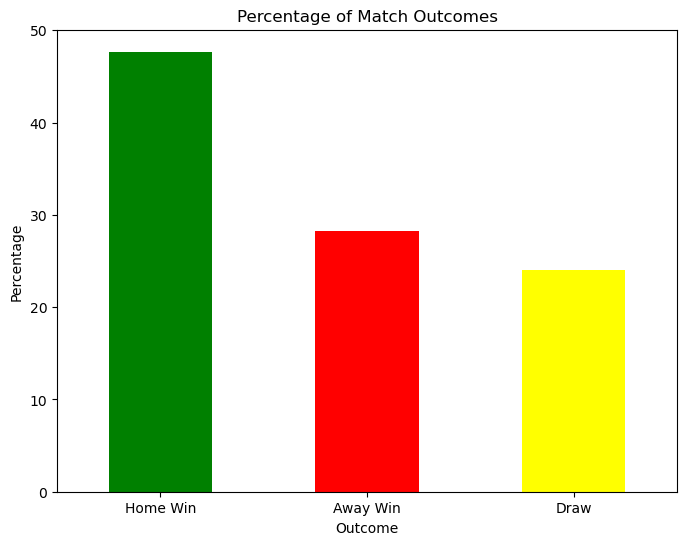

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
conditions = [
    (merged_dataset['home_team_goal'] > merged_dataset['away_team_goal']),
    (merged_dataset['home_team_goal'] < merged_dataset['away_team_goal']),
    (merged_dataset['home_team_goal'] == merged_dataset['away_team_goal'])
]
choices = ['Home Win', 'Away Win', 'Draw']
merged_dataset['match_outcome'] = np.select(conditions, choices)

# Calculate percentages
outcome_counts = merged_dataset['match_outcome'].value_counts(normalize=True) * 100

# Generate a graph for the percentage of home and away wins
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Percentage of Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


In [4]:
df = merged_dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

# Create the target variable (match outcome)
merged_dataset['match_outcome'] = np.select(
    [merged_dataset['home_team_goal'] > merged_dataset['away_team_goal'],
     merged_dataset['home_team_goal'] < merged_dataset['away_team_goal'],
     merged_dataset['home_team_goal'] == merged_dataset['away_team_goal']],
    ['home_win', 'away_win', 'draw']
)

# Select features for prediction
features = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing',
            'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
            'defenceAggression', 'defenceTeamWidth']

X = merged_dataset[features]
y = merged_dataset['match_outcome']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

    away_win       0.48      0.21      0.29    216170
        draw       0.41      0.05      0.09    183566
    home_win       0.51      0.90      0.65    364637

    accuracy                           0.50    764373
   macro avg       0.46      0.39      0.34    764373
weighted avg       0.47      0.50      0.41    764373



In [11]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
chanceCreationPassing     0.160392
defenceAggression         0.148100
chanceCreationCrossing    0.135501
defencePressure           0.133845
buildUpPlayPassing        0.130927
defenceTeamWidth          0.106510
chanceCreationShooting    0.101758
buildUpPlaySpeed          0.082966
dtype: float64


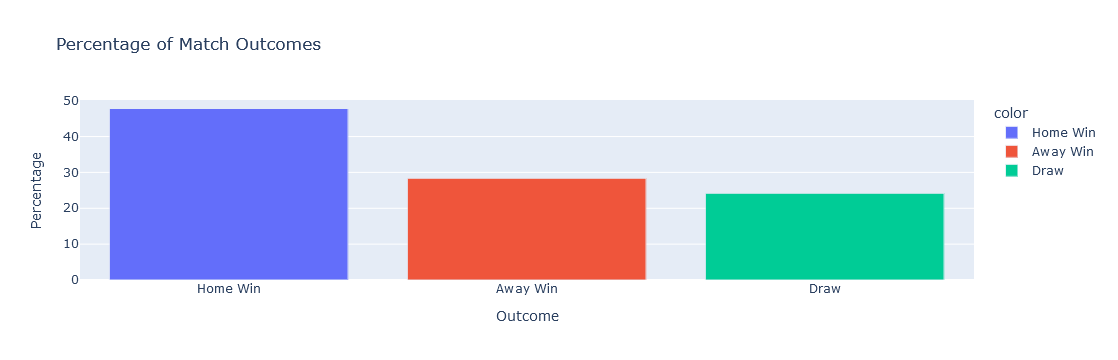

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the dataset
# Calculate match outcomes
conditions = [
    (merged_dataset['home_team_goal'] > merged_dataset['away_team_goal']),
    (merged_dataset['home_team_goal'] < merged_dataset['away_team_goal']),
    (merged_dataset['home_team_goal'] == merged_dataset['away_team_goal'])
]
choices = ['Home Win', 'Away Win', 'Draw']
merged_dataset['match_outcome'] = np.select(conditions, choices)

# Calculate percentages
outcome_counts = merged_dataset['match_outcome'].value_counts(normalize=True) * 100

# Create a Plotly bar chart
fig = px.bar(
    x=outcome_counts.index,
    y=outcome_counts.values,
    labels={'x': 'Outcome', 'y': 'Percentage'},
    title='Percentage of Match Outcomes',
    color=outcome_counts.index,
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the dataset
# Select the necessary columns for analysis
columns_to_keep = ['league_id', 'home_team_goal', 'away_team_goal']
df_filtered = merged_dataset[columns_to_keep]

# Define match outcome based on goals
df_filtered['match_outcome'] = np.select(
    [df_filtered['home_team_goal'] > df_filtered['away_team_goal'],
     df_filtered['home_team_goal'] < df_filtered['away_team_goal'],
     df_filtered['home_team_goal'] == df_filtered['away_team_goal']],
    ['Home Win', 'Away Win', 'Draw']
)

# Calculate percentages of each outcome within each league
league_outcomes = df_filtered.groupby('league_id')['match_outcome'].value_counts(normalize=True).unstack() * 100

# Prepare the data for plotting by resetting the index
df_plot = league_outcomes.reset_index()
df_plot = df_plot.melt(id_vars='league_id', var_name='Outcome', value_name='Percentage')

# Create a Plotly bar graph
fig = px.bar(
    df_plot, 
    x='league_id', 
    y='Percentage', 
    color='Outcome',
    title='Percentage of Match Outcomes by League',
    labels={'league_id': 'League ID', 'Percentage': 'Percentage (%)'},
    barmode='group'
)

fig.update_layout(xaxis_title='League ID', yaxis_title='Percentage (%)')
fig.show()
